In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [4]:
df = pd.read_csv('data_complete_clean.csv', sep=',')

/Users/asap_tug/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- HD [mm]: hole depth
- PR [dm/min]: penetration rate
- HP [bar]: hammering pressure
- FP [bar]: feed pressure = Hydraulic pressure that pushes the drill against the tunnel
face.
- DP [bar]: dumper pressure = Hydraulic pressure that absorbs the reaction force that
the drill receives from the bedrock. The harder the bedrock, the greater the dumper
pressure.
- RS [r/min]: rotation speed
- RP [bar]: rotation pressure
- WF [l/min]: water flow
- WP [bar]: water pressure
- Time [hh:mm:ss]

In [5]:
dfs = df[(df['Section number * 1000']>=555000)&(df['Section number * 1000']<=777000)].reset_index() 

In [6]:
dfs

,index,Unnamed: 0,Unnamed: 0.1,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Time,reference,Hole number,Hole type,Date and time at rockcontact,Boom,Section number * 1000,x\ty\tz\tmm,Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm),Rig serial number,dir,number,file,x mm,y mm,z mm
0,1237,1237,0,101,0.00,124.68,25.25,43.25,189.74,35.95,72.37,19.26,07:20:48,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
1,1238,1238,1,201,28.38,128.53,29.10,43.25,187.95,36.81,70.03,17.98,07:20:50,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
2,1239,1239,2,304,34.42,131.09,30.39,43.67,183.47,36.38,70.91,17.55,07:20:52,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
3,1240,1240,3,408,32.28,129.38,28.68,44.52,182.58,36.81,70.61,18.83,07:20:54,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
4,1241,1241,4,508,37.57,129.81,31.24,44.52,179.89,37.24,65.63,13.70,07:20:56,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216569,598211,598211,1644,1869,52.15,179.77,59.92,49.61,196.90,53.93,66.80,17.98,19:16:11,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216570,598212,598212,1645,1975,57.76,179.77,59.92,49.61,186.16,47.51,67.68,18.40,19:16:12,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216571,598213,598213,1646,2079,61.54,180.62,60.35,49.18,186.16,47.51,67.68,18.40,19:16:13,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216572,598214,598214,1647,2182,51.94,179.77,60.35,49.61,181.68,53.50,67.68,17.55,19:16:14,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991


In [7]:
dfs['Date and time at rockcontact'] = pd.to_datetime(dfs['Date and time at rockcontact'])

In [8]:
selected_columns_0 = [
    #'Unnamed: 0', 
    #'Unnamed: 0.1', 
    'HD mm', 
    'PR dm/min', 
    'HP bar', 
    'FP bar',
    'DP bar', 
    'RS r/min', 
    'RP bar', 
    'WF l/min', 
    'WP bar', 
    #'Time',
    #'reference', 
    #'Hole number', 
    'Hole type', 
    #'Date and time at rockcontact',
    #'Boom', 
    'Section number * 1000', 
    #'x\ty\tz\tmm',
    #'Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm)',
    #'Rig serial number', 
    #'dir', 
    'number', 
    #'reference',
    #'file', 
    #'x mm', 
    #'y mm', 
    #'z mm',
]

# ensure all numbers are numerical data

In [9]:
for c in selected_columns_0:
    dfs[c] = dfs[c].astype(str).str.replace(r"_", '').astype(float)
selected_columns = selected_columns_0 + ['Date and time at rockcontact']

datas = dfs[selected_columns]

# average data for a single borehole

In [10]:
datas_avg = pd.DataFrame()
for t in datas['Date and time at rockcontact'].unique():
    tmp = datas[datas['Date and time at rockcontact'] == t].reset_index(drop=True)
    datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
datas = datas_avg.copy()
datas

,DP bar,FP bar,HD mm,HP bar,Hole type,PR dm/min,RP bar,RS r/min,Section number * 1000,WF l/min,WP bar,number
0,44.732500,34.809167,663.750000,131.445000,4.0,36.870000,38.948333,183.771667,667464.0,68.928333,17.549167,613.0
1,44.802000,36.636667,822.733333,127.617333,0.0,43.149333,45.538667,185.204000,667464.0,68.054000,17.775333,613.0
2,44.767333,38.064000,824.200000,147.118000,4.0,39.564667,43.286667,179.578667,667464.0,64.988667,17.205333,613.0
3,43.778000,37.234500,1068.050000,130.961000,4.0,29.999500,37.365000,185.755500,667464.0,72.341000,17.675500,613.0
4,45.339333,35.665333,816.800000,130.748667,6.0,39.468667,42.001333,188.426667,667464.0,66.920000,17.662667,613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11785,44.012778,42.774444,971.166667,153.747778,8.0,46.334444,46.153333,186.315556,637107.0,66.560556,16.952778,583.0
11786,47.628333,53.374583,1292.333333,164.679167,7.0,50.699167,44.476250,188.508750,637107.0,66.426250,17.780417,583.0
11787,45.613810,46.895238,1126.476190,160.275714,4.0,43.469048,46.173810,188.152381,637107.0,69.385238,17.874762,583.0
11788,43.144000,41.258000,191.600000,135.676000,8.0,25.834000,43.430000,185.856000,637107.0,67.392000,17.290000,583.0


# now the MWD data is clean and ready to add target variables

In [11]:
datas

,DP bar,FP bar,HD mm,HP bar,Hole type,PR dm/min,RP bar,RS r/min,Section number * 1000,WF l/min,WP bar,number
0,44.732500,34.809167,663.750000,131.445000,4.0,36.870000,38.948333,183.771667,667464.0,68.928333,17.549167,613.0
1,44.802000,36.636667,822.733333,127.617333,0.0,43.149333,45.538667,185.204000,667464.0,68.054000,17.775333,613.0
2,44.767333,38.064000,824.200000,147.118000,4.0,39.564667,43.286667,179.578667,667464.0,64.988667,17.205333,613.0
3,43.778000,37.234500,1068.050000,130.961000,4.0,29.999500,37.365000,185.755500,667464.0,72.341000,17.675500,613.0
4,45.339333,35.665333,816.800000,130.748667,6.0,39.468667,42.001333,188.426667,667464.0,66.920000,17.662667,613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11785,44.012778,42.774444,971.166667,153.747778,8.0,46.334444,46.153333,186.315556,637107.0,66.560556,16.952778,583.0
11786,47.628333,53.374583,1292.333333,164.679167,7.0,50.699167,44.476250,188.508750,637107.0,66.426250,17.780417,583.0
11787,45.613810,46.895238,1126.476190,160.275714,4.0,43.469048,46.173810,188.152381,637107.0,69.385238,17.874762,583.0
11788,43.144000,41.258000,191.600000,135.676000,8.0,25.834000,43.430000,185.856000,637107.0,67.392000,17.290000,583.0


# add targets

In [12]:
expl = pd.read_csv('explosives.csv')

In [13]:
expl

,Unnamed: 0,tunnel support\n pattern,face\nNo.,upper \n/\nbottom,area\n[m2],progression\n[m],excavation \nvolume\n[m3],date,"wg3,piece","wg3,kg","wg25,piece","wg25,kg","wg,kg","anfo,kg","f06,piece","fconnect,piece","eldet,piece",pyro1,pyro2,pyro3,pyro4,pyro5,pyro6,pyro7,pyro8,pyro9,pyro10,pyro12,pyro14,pyro16,pyro17,pyro18,pyro19,pyro20,pyro21,total,kg/m3,faceN
0,0,C_,124,upper,30.681,1.2,36.8,2020.9.18,63.0,6.3,0.0,0.0,0.0,40.0,5.0,5.0,1.0,0.0,0.0,2.0,2.0,6.0,13.0,11.0,21.0,6.0,2.0,0,0,0,0,0,0,0,0,63.0,1.26,124
1,1,C_,125,upper,30.681,1.2,36.8,2020.9.18,83.0,8.3,0.0,0.0,0.0,59.0,7.0,7.0,1.0,2.0,5.0,8.0,7.0,6.0,11.0,12.0,24.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,1.83,125
2,2,D_-L,99-100,bottom,33.262,2.0,66.5,2020.9.23,22.0,2.2,0.0,0.0,11.7,20.0,3.0,4.0,1.0,0.0,0.0,0.0,7.0,10.0,3.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,22.0,0.51,100
3,3,D_-L,101-102,bottom,33.262,2.0,66.5,2020.9.23,23.0,2.3,0.0,0.0,10.0,31.0,4.0,5.0,2.0,0.0,0.0,0.0,7.0,4.0,5.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,23.0,0.65,102
4,4,D_-L,103-104,bottom,33.262,1.0,33.3,2020.9.23,27.0,2.7,0.0,0.0,9.5,39.0,4.0,4.0,1.0,0.0,0.0,0.0,7.0,5.0,8.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,27.0,1.54,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,D_,1032,upper & bottom,98.744,1.0,98.7,2021.12.8,0.0,0.0,488.0,48.8,0.0,65.0,8.0,8.0,1.0,9.0,12.0,11.0,16.0,6.0,6.0,7.0,8.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,0.66,1032
869,869,D_,1033,upper,98.744,1.0,98.7,2021.12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1033
870,870,D_,1034,upper & bottom,98.744,1.0,98.7,2021.12.9,0.0,0.0,450.0,45.0,0.0,52.0,8.0,8.0,1.0,10.0,12.0,10.0,15.0,10.0,8.0,4.0,5.0,6.0,2.0,0,0,0,0,0,0,0,0,82.0,0.53,1034
871,871,D_,1035,upper,98.744,1.0,98.7,2021.12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1035


In [14]:
expl.columns

Index(['Unnamed: 0', 'tunnel support\n pattern', 'face\nNo.',
       'upper \n/\nbottom', 'area\n[m2]', 'progression\n[m]',
       'excavation \nvolume\n[m3]', 'date', 'wg3,piece', 'wg3,kg',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN'],
      dtype='object')

# ensure all numbers are numerical data

In [15]:
expl_columns_tonum = ['area\n[m2]', 'progression\n[m]',
       'excavation \nvolume\n[m3]', 'wg3,piece', 'wg3,kg',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN']

In [16]:
expl[expl_columns_tonum] = expl[expl_columns_tonum].apply(pd.to_numeric, errors='coerce')
expl.date = pd.to_datetime(expl.date)
expl = expl.dropna().reset_index(drop=True)

# add target values to MWD data

In [17]:
target_columns = ['excavation \nvolume\n[m3]', 'total','kg/m3']
datas[target_columns] = 0
for exp in expl.faceN.unique():
    for col in target_columns:
        val = sum(expl[expl.faceN == exp][col])
        datas.loc[datas.number == exp,col]=val

# now the dataset is ready for analysis

In [18]:
datas

,DP bar,FP bar,HD mm,HP bar,Hole type,PR dm/min,RP bar,RS r/min,Section number * 1000,WF l/min,WP bar,number,excavation \nvolume\n[m3],total,kg/m3
0,44.732500,34.809167,663.750000,131.445000,4.0,36.870000,38.948333,183.771667,667464.0,68.928333,17.549167,613.0,98.7,89,0.81
1,44.802000,36.636667,822.733333,127.617333,0.0,43.149333,45.538667,185.204000,667464.0,68.054000,17.775333,613.0,98.7,89,0.81
2,44.767333,38.064000,824.200000,147.118000,4.0,39.564667,43.286667,179.578667,667464.0,64.988667,17.205333,613.0,98.7,89,0.81
3,43.778000,37.234500,1068.050000,130.961000,4.0,29.999500,37.365000,185.755500,667464.0,72.341000,17.675500,613.0,98.7,89,0.81
4,45.339333,35.665333,816.800000,130.748667,6.0,39.468667,42.001333,188.426667,667464.0,66.920000,17.662667,613.0,98.7,89,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11785,44.012778,42.774444,971.166667,153.747778,8.0,46.334444,46.153333,186.315556,637107.0,66.560556,16.952778,583.0,98.7,97,0.87
11786,47.628333,53.374583,1292.333333,164.679167,7.0,50.699167,44.476250,188.508750,637107.0,66.426250,17.780417,583.0,98.7,97,0.87
11787,45.613810,46.895238,1126.476190,160.275714,4.0,43.469048,46.173810,188.152381,637107.0,69.385238,17.874762,583.0,98.7,97,0.87
11788,43.144000,41.258000,191.600000,135.676000,8.0,25.834000,43.430000,185.856000,637107.0,67.392000,17.290000,583.0,98.7,97,0.87


# PCA 

In [19]:
#features = ['HD mm','PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
features = ['PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
#features = ['PR dm/min','HP bar','RS r/min']

X = datas.loc[:, features].values
            
x = StandardScaler().fit_transform(X)

components = len(features)    
pca = PCA(n_components=components)

principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.31293878 0.20592854 0.13087306 0.1237628  0.10050065 0.05322985
 0.04433845 0.02842786]


In [20]:
pc = pd.DataFrame(principalComponents)

# add PCA results to main dataset

In [21]:
rf_datas = datas.join(pc)
rf_datas

,DP bar,FP bar,HD mm,HP bar,Hole type,PR dm/min,RP bar,RS r/min,Section number * 1000,WF l/min,WP bar,number,excavation \nvolume\n[m3],total,kg/m3,0,1,2,3,4,5,6,7
0,44.732500,34.809167,663.750000,131.445000,4.0,36.870000,38.948333,183.771667,667464.0,68.928333,17.549167,613.0,98.7,89,0.81,2.054837,-0.137283,-0.547529,0.240176,-0.856207,-0.063409,-0.458995,-0.130619
1,44.802000,36.636667,822.733333,127.617333,0.0,43.149333,45.538667,185.204000,667464.0,68.054000,17.775333,613.0,98.7,89,0.81,1.587210,0.082087,-0.075453,-0.142403,0.279405,-0.128517,-0.413730,-0.058215
2,44.767333,38.064000,824.200000,147.118000,4.0,39.564667,43.286667,179.578667,667464.0,64.988667,17.205333,613.0,98.7,89,0.81,0.991797,0.690579,-0.588367,0.779087,-0.436951,-0.143292,-0.083322,-0.512343
3,43.778000,37.234500,1068.050000,130.961000,4.0,29.999500,37.365000,185.755500,667464.0,72.341000,17.675500,613.0,98.7,89,0.81,2.436146,-0.592963,-0.562081,-0.112470,-1.217026,0.251285,0.253666,0.017407
4,45.339333,35.665333,816.800000,130.748667,6.0,39.468667,42.001333,188.426667,667464.0,66.920000,17.662667,613.0,98.7,89,0.81,1.610958,-0.084331,0.092193,-0.201717,-0.547674,-0.486770,-0.616301,0.018365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11785,44.012778,42.774444,971.166667,153.747778,8.0,46.334444,46.153333,186.315556,637107.0,66.560556,16.952778,583.0,98.7,97,0.87,0.557667,0.076953,0.516481,0.799552,-0.030314,-0.241900,0.609340,-0.362517
11786,47.628333,53.374583,1292.333333,164.679167,7.0,50.699167,44.476250,188.508750,637107.0,66.426250,17.780417,583.0,98.7,97,0.87,-1.522082,-0.831261,0.146101,0.095796,-0.412634,-0.067787,0.021129,0.435182
11787,45.613810,46.895238,1126.476190,160.275714,4.0,43.469048,46.173810,188.152381,637107.0,69.385238,17.874762,583.0,98.7,97,0.87,-0.225086,-0.705287,0.103569,-0.232881,-0.146983,0.001645,0.525063,-0.262071
11788,43.144000,41.258000,191.600000,135.676000,8.0,25.834000,43.430000,185.856000,637107.0,67.392000,17.290000,583.0,98.7,97,0.87,1.757276,0.580876,-0.038352,-0.167897,-0.836476,0.002665,0.993389,0.030452


# Random forest

In [22]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

# reshuffle the data

In [23]:
rf_datas = rf_datas.sample(frac=1).reset_index(drop=True)
rf_datas

,DP bar,FP bar,HD mm,HP bar,Hole type,PR dm/min,RP bar,RS r/min,Section number * 1000,WF l/min,WP bar,number,excavation \nvolume\n[m3],total,kg/m3,0,1,2,3,4,5,6,7
0,46.545000,47.224167,665.500000,157.825833,8.0,38.563333,46.225000,187.146667,759655.0,66.805000,17.405833,703.0,98.7,98,0.29,-0.463935,0.006102,0.269267,-0.156147,-0.598652,0.122862,0.232890,-0.155833
1,47.271111,51.096111,961.333333,130.087778,6.0,21.771111,47.443333,180.840000,717375.0,56.518333,18.333333,663.0,98.7,98,1.53,-0.644973,2.101135,-1.080731,-1.256393,-0.634202,-0.387731,0.004712,1.252480
2,47.170417,39.393750,1285.500000,161.636667,0.0,56.190833,44.226250,180.900833,759655.0,64.570833,17.316667,708.0,98.7,59,0.78,-0.376351,-0.031239,-0.333650,1.118802,-0.035924,-0.333011,-1.036622,-0.713644
3,43.342667,42.514000,832.200000,140.098667,0.0,65.203333,45.293333,183.450667,605240.0,69.891333,18.032667,558.0,98.7,48,0.48,0.965361,-1.067325,-0.333105,0.999856,1.402721,-0.271847,0.187871,0.177550
4,47.664583,56.317500,1290.416667,191.881667,0.0,54.578750,43.923750,190.185833,717375.0,69.075833,18.119583,665.0,98.7,96,1.40,-2.372641,-1.847321,0.016356,0.147249,-0.524166,-0.186300,0.567949,-0.181093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11785,43.770000,42.744000,814.866667,129.426667,4.0,47.388667,50.969333,177.525333,737309.0,68.132667,17.890667,683.0,98.7,88,0.71,1.001919,0.628062,-0.658205,0.212924,1.461125,0.497334,0.364361,0.004467
11786,48.597619,51.726190,1124.857143,161.872857,4.0,40.168095,44.858095,185.946190,770957.0,65.840952,17.568571,714.0,98.7,100,0.61,-1.476165,-0.117873,-0.034479,-0.230293,-0.920767,0.332639,-0.261810,0.212690
11787,46.899231,49.071538,1367.961538,153.079231,4.0,38.695000,46.239615,183.404231,599853.0,64.212308,17.975769,545.0,98.7,90,1.01,-0.754432,0.335357,-0.516987,-0.327812,-0.328693,-0.038723,0.071568,0.243169
11788,47.086579,44.355000,2012.500000,173.553684,0.0,51.132895,45.605000,188.514737,683388.0,63.636053,18.481579,632.0,98.7,0,0.00,-1.116090,-0.700346,-0.297137,-0.218800,-0.066287,-1.186813,-0.285394,-0.496127


# test train split

In [24]:
columns = [ 'Hole type','FP bar', 'DP bar', 'RS r/min','RP bar', 'WF l/min', 
           'PR dm/min', 'HP bar','HD mm']+[0,1,2]

In [25]:
x = rf_datas[columns] # Features
y = rf_datas['kg/m3'].values  # Target

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# train RF

In [27]:
rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=600, random_state=42)

# Predict with RF and evaluate

In [28]:
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse,rmse)

0.04476760483900357 0.2115835646712749


# feature importance

Text(0, 0.5, 'Mean decrease in impurity')

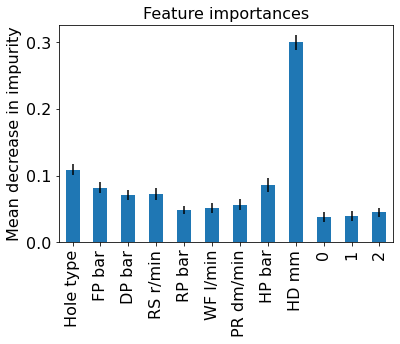

In [29]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

# visual check on pred and act

In [30]:
rf_out = pd.DataFrame(prediction, columns=['pred'])
rf_out['act'] = y_test
rf_out = rf_out.sort_values(by=['act']).reset_index(drop=True)
rf_out

,pred,act
0,0.025150,0.00
1,0.382350,0.00
2,0.271400,0.00
3,0.471750,0.00
4,0.056450,0.00
...,...,...
3532,1.115417,1.53
3533,1.343150,1.53
3534,1.404050,1.53
3535,1.263583,1.53


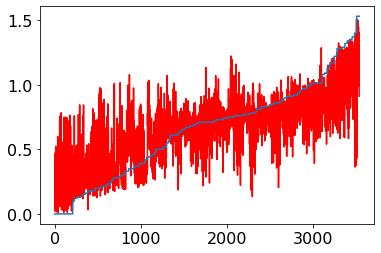

In [31]:
plt.plot(rf_out.pred, color='red')
plt.plot(rf_out.act)